<a href="https://colab.research.google.com/github/scorepia/Project_mornortor/blob/main/ScrabbleGAN_Demo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ScrabbleGAN


In [1]:
!pip install gdown
!pip install --upgrade --no-cache-dir gdown

!gdown https://drive.google.com/uc?id=1q-7NeddtE6iKZlUDNSWS4P8EwqucsdDs --no-cookies

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1q-7NeddtE6iKZlUDNSWS4P8EwqucsdDs
To: /content/สำเนาของ generator_15.zip
100% 60.5M/60.5M [00:00<00:00, 87.2MB/s]


In [2]:
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-8jn4614d
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-8jn4614d
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184468 sha256=03d3530bb0febfa20c421cb69b47ca08e4f2da6755134d98289824219c36f22c
  Stored in directory: /tmp/pip-ephem-wheel-cache-e3godgm3/wheels/3b/ee/a2/ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs


In [3]:
import os
import random

import gin
import numpy as np
import tensorflow as tf
import tensorflow_docs.vis.embed as embed
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
!ls

'สำเนาของ generator_15.zip'   sample_data


In [5]:
!unzip "/content/สำเนาของ generator_15.zip" -d "/content/สำเนาของ generator_15"

Archive:  /content/สำเนาของ generator_15.zip
   creating: /content/สำเนาของ generator_15/content/scrabble-gan/res/out/big_ac_gan/model/generator_15/
  inflating: /content/สำเนาของ generator_15/content/scrabble-gan/res/out/big_ac_gan/model/generator_15/saved_model.pb  
   creating: /content/สำเนาของ generator_15/content/scrabble-gan/res/out/big_ac_gan/model/generator_15/variables/
  inflating: /content/สำเนาของ generator_15/content/scrabble-gan/res/out/big_ac_gan/model/generator_15/variables/variables.data-00000-of-00001  
  inflating: /content/สำเนาของ generator_15/content/scrabble-gan/res/out/big_ac_gan/model/generator_15/variables/variables.index  
   creating: /content/สำเนาของ generator_15/content/scrabble-gan/res/out/big_ac_gan/model/generator_15/assets/
  inflating: /content/สำเนาของ generator_15/content/scrabble-gan/res/out/big_ac_gan/model/generator_15/keras_metadata.pb  


In [6]:
latent_dim = 128
char_vec = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

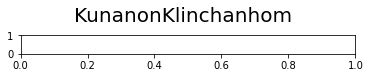

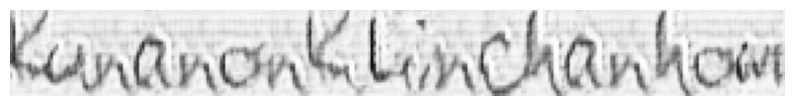

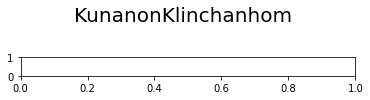

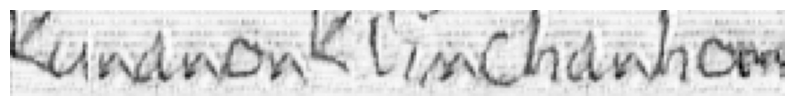

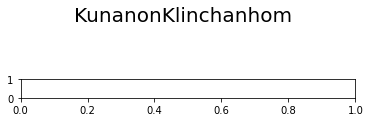

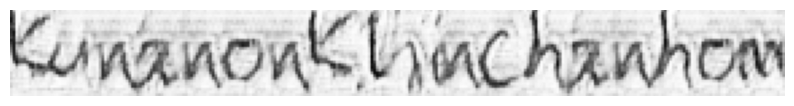

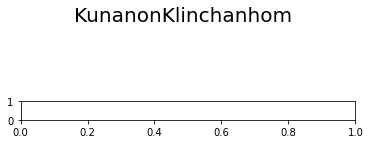

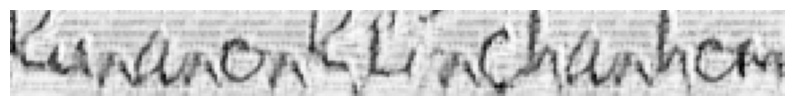

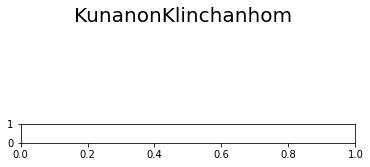

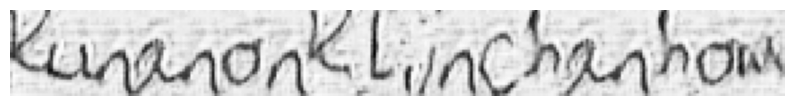

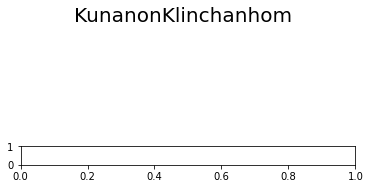

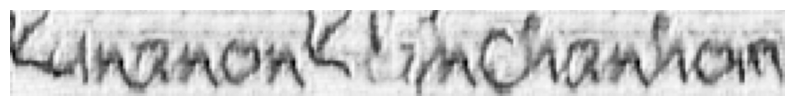

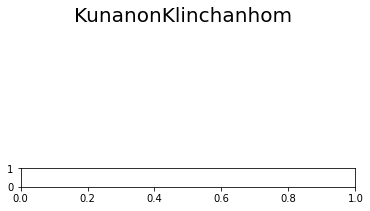

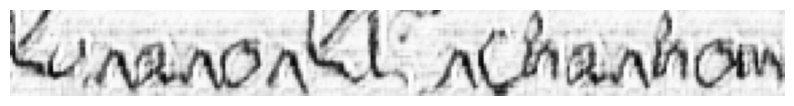

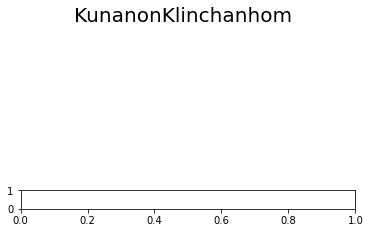

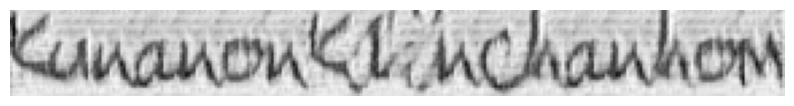

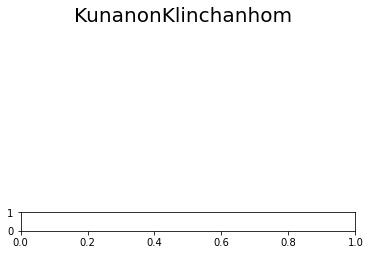

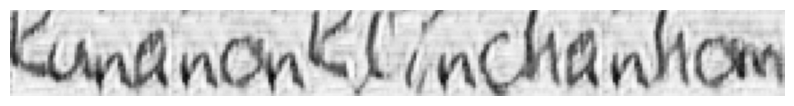

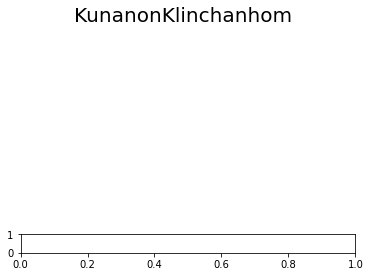

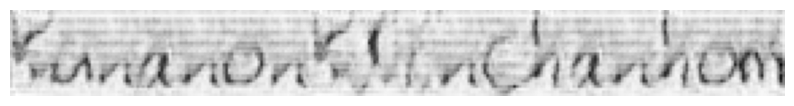

In [18]:
path_to_saved_model = '/content/สำเนาของ generator_15/content/scrabble-gan/res/out/big_ac_gan/model/generator_15'

# number of samples to generate
n_samples = 10
# your sample string
sample_string = 'KunanonKlinchanhom'

# load trained model
imported_model = tf.saved_model.load(path_to_saved_model)

# inference loop
for idx in range(1):
  fake_labels = []
  words = [sample_string] * 10
  noise = tf.random.normal([n_samples, latent_dim])
  
  # encode words
  for word in words:
    fake_labels.append([char_vec.index(char) for char in word])
  fake_labels = np.array(fake_labels, np.int32)

  # run inference process
  predictions = imported_model([noise, fake_labels], training=False)
  # transform values into range [0, 1]
  predictions = (predictions + 1) / 2.0

  # plot results
  for i in range(predictions.shape[0]):
    plt.suptitle(sample_string, fontsize=20)
    plt.subplot(10, 1, i + 1)
    figure(figsize=(10, 6), dpi=100)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    # plt.text(0, -1, "".join([char_vec[label] for label in fake_labels[i]]))
    plt.axis('off')
    plt.show()